In [1]:
from __future__ import print_function
import numpy as np
import re
import sys
import math
import scipy.misc
import subprocess
import os.path
import imageio
import vifp
import psnr
import ssim
import reco
import cv2 as cv
import argparse
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

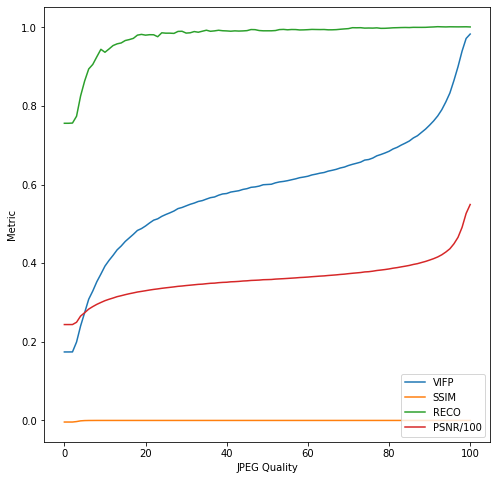

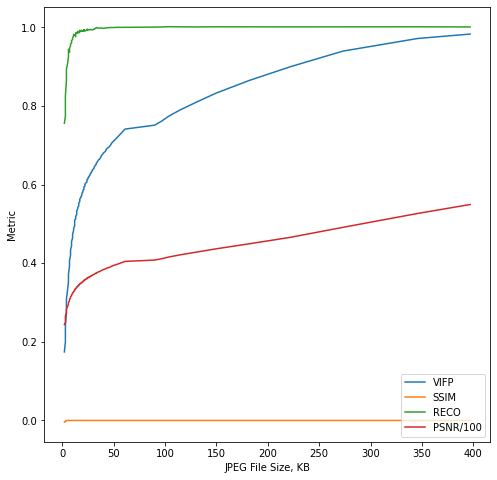

In [2]:
ref_file = 'lena.png'
dist_file = 'lena_temp.jpg'

ref = imageio.imread(ref_file, as_gray=True).astype(np.float32)

quality_values = []
size_values = []
vifp_values = []
ssim_values = []
psnr_values = []
reco_values = []



for quality in tqdm(range(0, 101, 1)):
    !gm convert $ref_file -quality $quality $dist_file
    file_size = os.path.getsize(dist_file)

    dist = imageio.imread(dist_file, as_gray=True).astype(np.float32)

    quality_values.append( quality )
    size_values.append( int(file_size/1024) )
    vifp_values.append( vifp.vifp_mscale(ref, dist) )
    ssim_values.append( ssim.ssim_exact(ref/255, dist/255) )
    psnr_values.append( psnr.psnr(ref, dist) )
    reco_values.append( reco.reco(ref/255, dist/255) )

plt.figure(figsize=(8, 8))
plt.plot(quality_values, vifp_values, label='VIFP')
plt.plot(quality_values, ssim_values, label='SSIM')
plt.plot(quality_values, reco_values, label='RECO')
plt.plot(quality_values, np.asarray(psnr_values)/100.0, label='PSNR/100')
plt.legend(loc='lower right')
plt.xlabel('JPEG Quality')
plt.ylabel('Metric')
plt.savefig('jpg_demo_quality.png')

plt.figure(figsize=(8, 8))

plt.plot(size_values, vifp_values, label='VIFP')
plt.plot(size_values, ssim_values, label='SSIM')
plt.plot(size_values, reco_values, label='RECO')
plt.plot(size_values, np.asarray(psnr_values)/100.0, label='PSNR/100')
plt.legend(loc='lower right')
plt.xlabel('JPEG File Size, KB')
plt.ylabel('Metric')
plt.savefig('jpg_demo_size.png')

